### Carregado e organizando a base de dados que iremos usar. ###

In [227]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
base = pd.read_csv("MICRODADOS_ENEM_ESCOLA.csv",delimiter=';',encoding="iso-8859-1")

In [229]:
base = base[(base.SG_UF_ESCOLA=="AM")].sort_values(['NU_ANO'],ascending = True)
base = base[(base.PC_FORMACAO_DOCENTE >=50) &(base.NU_TAXA_PERMANENCIA.notnull()) & (base.NU_TAXA_PARTICIPACAO > 40)]
base = base[(base.NU_MEDIA_RED).notnull()]
base = base.drop(['NU_MEDIA_OBJ', 'NU_MEDIA_TOT','CO_ESCOLA_EDUCACENSO','CO_MUNICIPIO_ESCOLA','INSE','CO_UF_ESCOLA', 'NO_ESCOLA_EDUCACENSO'], axis = 1)


### Analisando correlação entre variáveis. ###

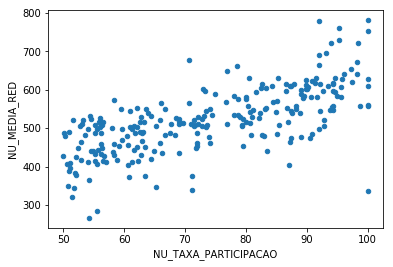

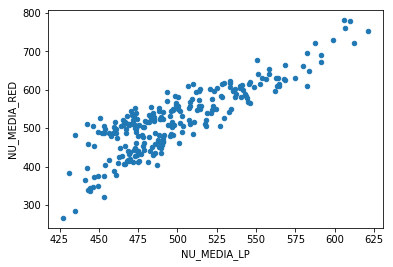

In [230]:
base.plot(kind='scatter',x='NU_TAXA_PARTICIPACAO',y='NU_MEDIA_RED')
base.plot(kind='scatter',x='NU_MEDIA_LP',y='NU_MEDIA_RED')

## A média em Linguagem tem uma correlação mais forte do que a Taxa de Participação, é por isso que vamos usa-lá para regressão ###